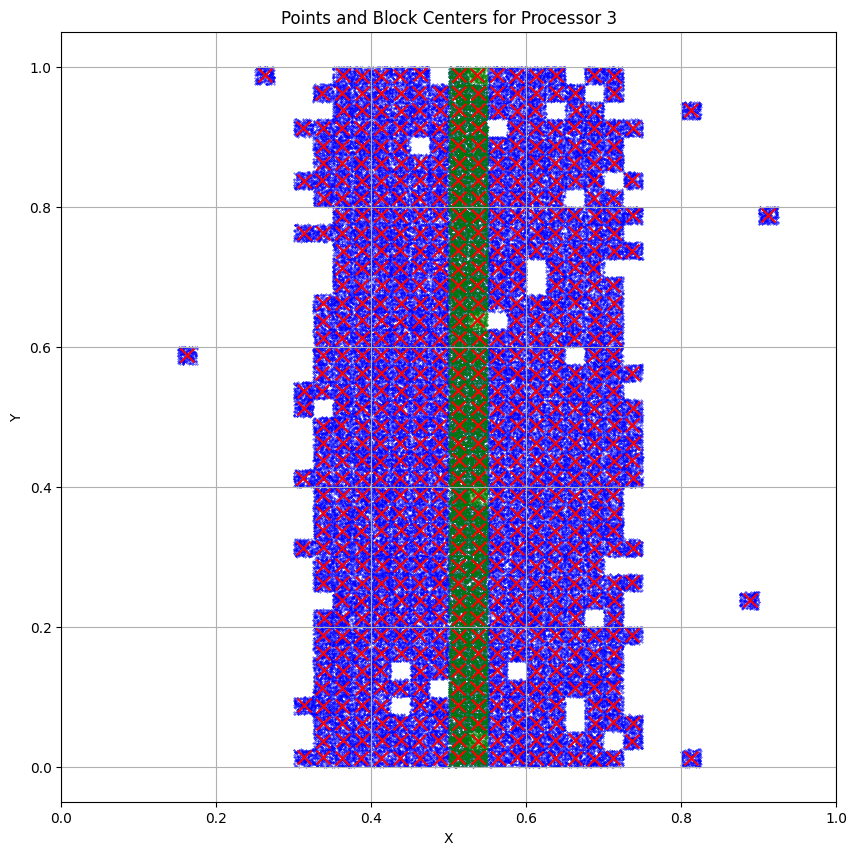

In [1]:
import matplotlib.pyplot as plt

def read_data(filename):
    blocks = []
    with open(filename, 'r') as file:
        while True:
            line = file.readline()
            if not line:
                break
            local_order, global_order, center_x, center_y, num_points = map(float, line.split())
            points = []
            for _ in range(int(num_points)):
                point_x, point_y = map(float, file.readline().split())
                points.append((point_x, point_y))
            blocks.append({
                'local_order': int(local_order),
                'global_order': int(global_order),
                'center': (center_x, center_y),
                'points': points
            })
    return blocks

def visualize(blocks, blocks_info):
    plt.figure(figsize=(10, 10))
    for block in blocks:
        points = block['points']
        if points:
            x, y = zip(*points)
            plt.scatter(x, y, color = 'blue', s = 0.1)
        plt.scatter(block['center'][0], block['center'][1], color='red', marker='x', s=100)
    for block in blocks_info:
        points = block['points']
        if points:
            x, y = zip(*points)
            plt.scatter(x, y, color = 'green', s = 0.1)
        plt.scatter(block['center'][0], block['center'][1], color='red', marker='x', s=100)
    # plt.title("Points and Block Centers for Processor 3")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.xlim(0, 1)
    # plt.legend()
    plt.grid(True)
    plt.savefig("./candidates.pdf")
    plt.show()

if __name__ == "__main__":
    blocks = read_data("processor_data.txt")
    blocks_info = read_data("processor_data_blockinfo.txt")
    visualize(blocks, blocks_info)
    # for block in blocks:
    #     print(block["global_order"])
    # print("=======")
    # for block in blocks_info:
    #     print(block["global_order"])

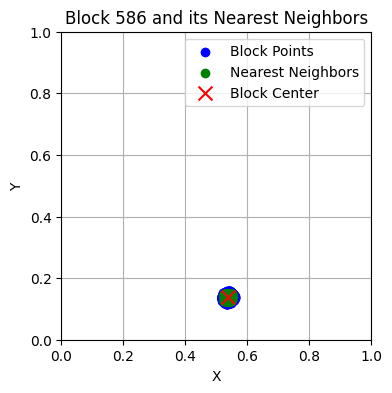

In [15]:
import matplotlib.pyplot as plt

def read_data(filename):
    blocks = []
    with open(filename, 'r') as file:
        block = {}
        while True:
            line = file.readline()
            if not line:
                break
            if line.startswith("Block Global Order:"):
                if block:
                    blocks.append(block)
                block = {'points': [], 'nearest_neighbors': []}
                block['global_order'] = int(line.split(': ')[1])
            elif line.startswith("Block Center:"):
                center = line.split(': ')[1].strip()[1:-1].split(', ')
                block['center'] = (float(center[0]), float(center[1]))
            elif line.startswith("Points:"):
                continue
            elif line.startswith("Nearest Neighbors:"):
                continue
            elif line.startswith("("):
                point = line.strip()[1:-1].split(', ')
                if 'center' in block:
                    block['points'].append((float(point[0]), float(point[1])))
                else:
                    block['nearest_neighbors'].append((float(point[0]), float(point[1])))
        if block:
            blocks.append(block)
    return blocks

def visualize(block):
    plt.figure(figsize=(4, 4))
    points = block['points']
    neighbors = block['nearest_neighbors']
    
    if points:
        x, y = zip(*points)
        plt.scatter(x, y, label="Block Points", color='blue')
    
    if neighbors:
        x, y = zip(*neighbors)
        plt.scatter(x, y, label="Nearest Neighbors", color='green')

    center = block['center']
    plt.scatter(center[0], center[1], color='red', marker='x', s=100, label="Block Center")
    
    plt.title(f"Block {block['global_order']} and its Nearest Neighbors")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    blocks = read_data("block_info.txt")
    blocks
    if blocks:
        visualize(blocks[11])  # Visualize the first block as an example


In [8]:
blocks[0]

{'points': [(0.60095, 0.11107),
  (0.607048, 0.112391),
  (0.61363, 0.10235),
  (0.610078, 0.117588),
  (0.606969, 0.141603),
  (0.615573, 0.151046),
  (0.619378, 0.151958),
  (0.608049, 0.174228),
  (0.480639, 0.203983),
  (0.614403, 0.181731),
  (0.487566, 0.211724),
  (0.581381, 0.201822),
  (0.472506, 0.209712),
  (0.473894, 0.210883),
  (0.603803, 0.193913),
  (0.611167, 0.19092),
  (0.484997, 0.216821),
  (0.347116, 0.0119649),
  (0.618958, 0.187616),
  (0.343841, 0.0189108),
  (0.341941, 0.0634247),
  (0.477551, 0.219136),
  (0.337912, 0.0321166),
  (0.612442, 0.198021),
  (0.614742, 0.197609),
  (0.33715, 0.0676078),
  (0.580052, 0.216035),
  (0.454208, 0.217788),
  (0.476428, 0.228726),
  (0.329778, 0.0325992)],
 'nearest_neighbors': [(0.521563, 0.0525293),
  (0.523548, 0.0356664),
  (0.514382, 0.0732357),
  (0.514936, 0.0382648),
  (0.511386, 0.0407559),
  (0.509763, 0.000875587),
  (0.517613, 0.0896536),
  (0.516384, 0.0145708),
  (0.5067, 0.0720612),
  (0.519934, 0.0438252)